# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
import urllib
# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set the inital values including the number of calling sets, the stored data list "current_weather", the API setting, and the cities list's index
numofset=len(cities)//50+1
settings = {"units": "metric", "appid": api_key}
current_weather=[]
cityindex=-1

# Call the API with 50 cities per set and wait for 61 seconds for the next call. Print the call status.
# Loop the set
for i in range(numofset):
#   Conditioning the last set, which is less than 50 cities.
    if i == numofset-1:
        numofrec=len(cities)%50
    else:
        numofrec=50
#   Loop the call
    for j in range(numofrec):
        cityindex+=1
        while True:
#           Conditioning out the cities are not in the openweather API and make sure the call will not exceed the cities list.
            try:
                if cityindex>=len(cities):
                    break
                else:
                    current_weather.append(ow.get_current(cities[cityindex], **settings))
                    print(f"Processing Record {j+1} of Set {i+1} | {cities[cityindex]}")
            except urllib.error.HTTPError:
                print(f"City is not found. Skipping...")
                cityindex+=1
                continue
            break
    time.sleep(61)

Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | margate
Processing Record 3 of Set 1 | pimenta bueno
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | belaya gora
Processing Record 6 of Set 1 | albany
City is not found. Skipping...
City is not found. Skipping...
City is not found. Skipping...
Processing Record 7 of Set 1 | saint-georges
Processing Record 8 of Set 1 | kavieng
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | pevek
City is not found. Skipping...
Processing Record 11 of Set 1 | bulgan
Processing Record 12 of Set 1 | boguchany
Processing Record 13 of Set 1 | turukhansk
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | vao
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | ostrovnoy
Processi

Processing Record 36 of Set 4 | kalianget
Processing Record 37 of Set 4 | yayva
Processing Record 38 of Set 4 | vestmanna
Processing Record 39 of Set 4 | carlyle
Processing Record 40 of Set 4 | port hardy
Processing Record 41 of Set 4 | kaitangata
Processing Record 42 of Set 4 | rock sound
Processing Record 43 of Set 4 | mulungu
City is not found. Skipping...
Processing Record 44 of Set 4 | oussouye
Processing Record 45 of Set 4 | nogliki
Processing Record 46 of Set 4 | castro
City is not found. Skipping...
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | taremskoye
Processing Record 49 of Set 4 | luchegorsk
Processing Record 50 of Set 4 | iqaluit
Processing Record 1 of Set 5 | black river
Processing Record 2 of Set 5 | araouane
Processing Record 3 of Set 5 | kasongo-lunda
Processing Record 4 of Set 5 | jumla
City is not found. Skipping...
Processing Record 5 of Set 5 | guerrero negro
Processing Record 6 of Set 5 | todos santos
Processing Record 7 of Set 5 | b

Processing Record 16 of Set 8 | andira
Processing Record 17 of Set 8 | siirt
Processing Record 18 of Set 8 | pitkyaranta
Processing Record 19 of Set 8 | porto novo
Processing Record 20 of Set 8 | araceli
City is not found. Skipping...
Processing Record 21 of Set 8 | dandong
Processing Record 22 of Set 8 | gamboula
Processing Record 23 of Set 8 | yining
Processing Record 24 of Set 8 | port moresby
Processing Record 25 of Set 8 | walvis bay
Processing Record 26 of Set 8 | tual
Processing Record 27 of Set 8 | altona
Processing Record 28 of Set 8 | baruun-urt
Processing Record 29 of Set 8 | planos
Processing Record 30 of Set 8 | bandon
City is not found. Skipping...
Processing Record 31 of Set 8 | wellington
Processing Record 32 of Set 8 | oranjemund
Processing Record 33 of Set 8 | janesville
Processing Record 34 of Set 8 | baiyin
City is not found. Skipping...
Processing Record 35 of Set 8 | tokur
Processing Record 36 of Set 8 | shache
Processing Record 37 of Set 8 | houma
Processing Reco

Processing Record 49 of Set 11 | kumbo
Processing Record 50 of Set 11 | emerald
Processing Record 1 of Set 12 | mango
City is not found. Skipping...
Processing Record 2 of Set 12 | san rafael
Processing Record 3 of Set 12 | nha trang
Processing Record 4 of Set 12 | ullapool
Processing Record 5 of Set 12 | okhotsk
Processing Record 6 of Set 12 | dunedin
Processing Record 7 of Set 12 | sola
Processing Record 8 of Set 12 | roald
Processing Record 9 of Set 12 | dongli
Processing Record 10 of Set 12 | ayan


In [4]:
# Check the length of the recevied data to show the number of the called cities in openweather API
len(current_weather)

560

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Wrap the data from the received API data and change to the desired format for the dataframe
summary = ["name","clouds.all","sys.country","dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]
datastack = [weather(*summary) for weather in current_weather]
data=list(zip(*datastack))

# Change the time to the normal reading format
data[3]=[time.strftime('%Y-%m-%d', time.localtime(i)) for i in data[3]]

# Build the data frame and show
colname=['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']
weather_df = pd.DataFrame(np.column_stack(data), columns=colname)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Airai,0,TL,2019-01-09,93,-8.93,125.41,20.37,0.96
1,Margate,20,AU,2019-01-09,58,-43.03,147.26,13.0,7.2
2,Pimenta Bueno,64,BR,2019-01-09,82,-11.68,-61.19,26.77,1.31
3,Arraial do Cabo,0,BR,2019-01-09,65,-22.97,-42.02,31.0,15.4
4,Belaya Gora,32,RU,2019-01-09,60,68.54,146.19,-36.39,1.31


In [6]:
# Save the weather data as a CSV file
weather_df.to_csv("output_data/weather.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

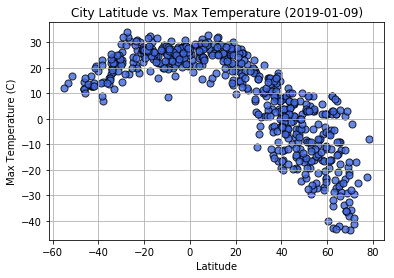

In [7]:
# Make the desired plot
fig, ax = plt.subplots()
lat=data[5]
max_t=data[7]
ax.scatter(lat, max_t, color=["royalblue"], s=50, alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
ax.grid(True)
ax.set_title(f"City Latitude vs. Max Temperature ({data[3][1]})")
ax.set_ylabel("Max Temperature (C)")
ax.set_xlabel("Latitude")

# Save the plot
plt.savefig(f"City Latitude vs. Max Temperature ({data[3][1]}).png")

#### Latitude vs. Humidity Plot

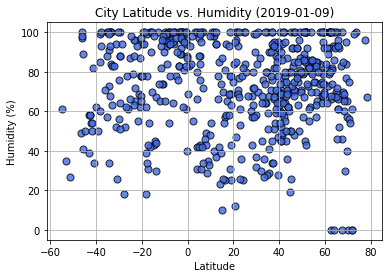

In [8]:
# Make the desired plot
fig, ax = plt.subplots()
humidity=data[4]
ax.scatter(lat, humidity, color=["royalblue"], s=50, alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
ax.grid(True)
ax.set_title(f"City Latitude vs. Humidity ({data[3][1]})")
ax.set_ylabel("Humidity (%)")
ax.set_xlabel("Latitude")

# Save the plot
plt.savefig(f"City Latitude vs. Humidity ({data[3][1]}).png")

#### Latitude vs. Cloudiness Plot

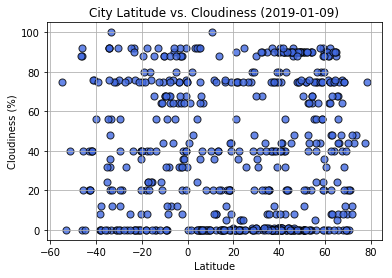

In [9]:
# Make the desired plot
fig, ax = plt.subplots()
cloudinesss=data[1]
ax.scatter(lat, cloudinesss, color=["royalblue"], s=50, alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
ax.grid(True)
ax.set_title(f"City Latitude vs. Cloudiness ({data[3][1]})")
ax.set_ylabel("Cloudiness (%)")
ax.set_xlabel("Latitude")

# Save the plot
plt.savefig(f"City Latitude vs. Cloudiness ({data[3][1]}).png")

#### Latitude vs. Wind Speed Plot

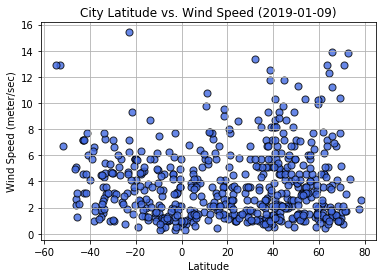

In [10]:
# Make the desired plot
fig, ax = plt.subplots()
windspeed=data[8]
ax.scatter(lat, windspeed, color=["royalblue"], s=50, alpha=0.8, edgecolors='black')

# Incorporate the other graph properties
ax.grid(True)
ax.set_title(f"City Latitude vs. Wind Speed ({data[3][1]})")
ax.set_ylabel("Wind Speed (meter/sec)")
ax.set_xlabel("Latitude")

# Save the plot
plt.savefig(f"City Latitude vs. Wind Speed ({data[3][1]}).png")

In [11]:
'Conclusion: During the summer time in Southern Hemisphere right now, the -20 degree latitude shows the highest temperature, and it follows the knowledge learnt from Geography'

'Conclusion: During the summer time in Southern Hemisphere right now, the -20 degree latitude shows the highest temperature, and it follows the knowledge learnt from Geography'